In [3]:
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Loading the train.csv

In [4]:
TRAIN_CSV = Path('Artifacts/train.csv')

In [5]:
sales_df = pd.read_csv(TRAIN_CSV)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Getting More Information about train.csv

In [6]:
sales_df.shape

(8523, 12)

In [7]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
sales_df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [10]:
sales_df["Outlet_Establishment_Year"] = sales_df.Outlet_Establishment_Year.astype('object')
sales_df.Outlet_Establishment_Year.nunique()

9

#### `"Outlet_Establishment_Year" changed to object because it contains only 9 unique years only`
* OUT049 --> 1999
* OUT018 --> 2009

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


# Checking for Nan values

In [12]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
sales_df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### `"Item_weight" has approx. 17% missing values and "Outlet_Size" has approx. 28% missing values which are greater than 5%, these need to be imputed for further analysis`

# Imputing the missing values for "Outlet_Size"

In [14]:
import matplotlib.pyplot as plt

In [15]:
print("Outlet_Size : ",sales_df["Outlet_Size"].dtype)

Outlet_Size :  object


In [16]:
sales_df.Outlet_Size.isnull().sum()

2410

In [17]:
sales_df.Outlet_Size.isnull().mean()*100

28.27642848762173

In [18]:
sales_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
sales_df.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64

#### `Two Imputation techniques to find missing values: `
#### `1. Random Sample`
#### `2. Making seperate category named as "Others"`

#### `We will choose the best technique based on our results ` 

In [20]:
without_Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False]
without_Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [21]:
Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull()]
Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


## Random Sample Imputation

In [22]:
 random_sampled_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False].sample(2410).Outlet_Size.values
 random_sampled_Outlet_size

array(['Small', 'High', 'Medium', ..., 'Medium', 'Medium', 'Small'],
      dtype=object)

In [23]:
Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size
Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Medium,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344


In [24]:
imputed_outlet_size = pd.concat([without_Nan_Outlet_size,Nan_Outlet_size])
imputed_outlet_size.shape

(8523, 12)

In [25]:
imputed_outlet_size.Outlet_Size.isnull().mean()*100

0.0

## Checking for Distribution of "Item_Outlet_Sales" for each "Outlet_Size" category before imputation and after imputation

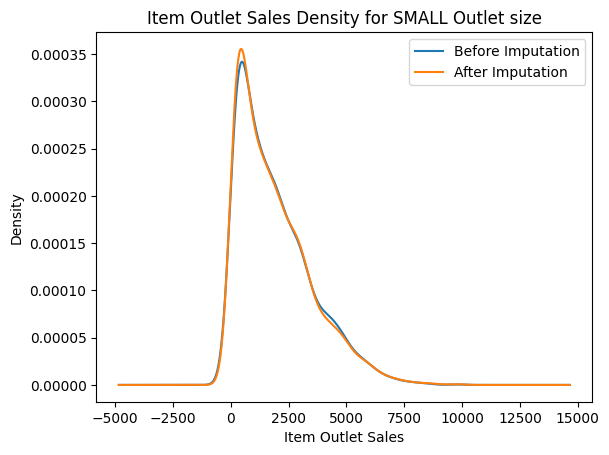

In [26]:
sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for SMALL Outlet size")
plt.legend()

#### `"Item_Outlet_Sales" distribution for SMALL "outlet_size" is same after the imputation as seen from the overlapping`

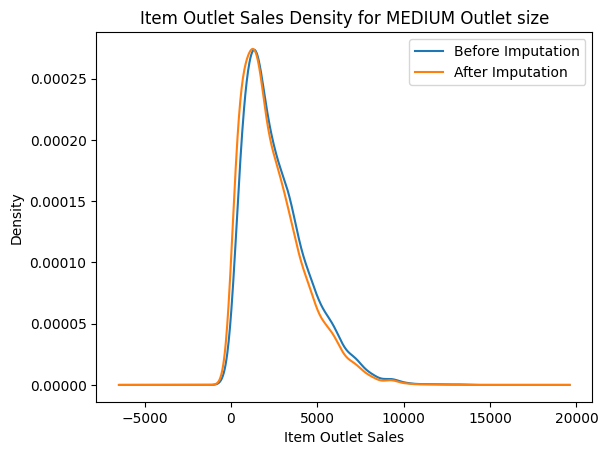

In [27]:
sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for MEDIUM Outlet size")
plt.legend()

#### `"Item_Outlet_Sales" distribution for MEDIUM "outlet_size" is same after the imputation as seen from the overlapping`

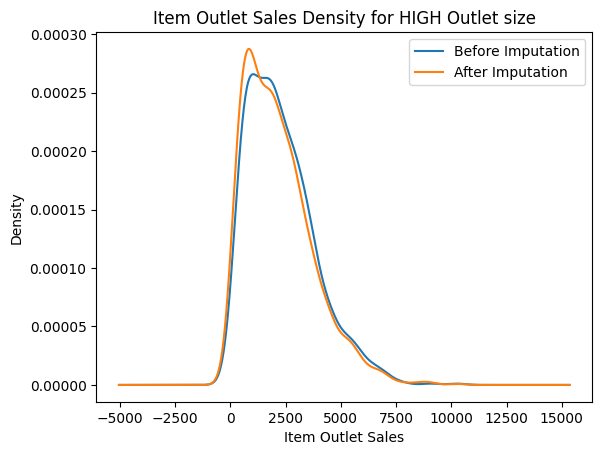

In [28]:
sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for HIGH Outlet size")
plt.legend()

#### `"Item_Outlet_Sales" distribution for HIGH "outlet_size" is same after the imputation as seen from the overlapping`

## Checking for change in variance in "Item_Outlet_Sales" for each "Outlet_Size" category after imputation

In [29]:
before_imputation = sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']

print(f"=====SMALL OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====SMALL OUTLET SIZE======
Before Imputation Variance : 2503895.9696139977
After Imputation Variance : 2529064.2467594524


In [30]:
before_imputation = sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']

print(f"=====MEDIUM OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====MEDIUM OUTLET SIZE======
Before Imputation Variance : 3441806.1034910944
After Imputation Variance : 3274757.164194001


In [31]:
before_imputation = sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']

print(f"=====HIGH OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====HIGH OUTLET SIZE======
Before Imputation Variance : 2351719.364319561
After Imputation Variance : 2386093.760190635


# # Imputing the missing values for "Item_weight"

In [32]:
imputed_outlet_size.Item_Weight.isnull().sum()

1463

In [33]:
imputed_outlet_size.Item_Weight.isnull().mean()*100

17.165317376510618

In [34]:
print("Item_Weight : ",imputed_outlet_size["Item_Weight"].dtype)

Item_Weight :  float64


In [35]:
imputed_outlet_size.shape

(8523, 12)

In [36]:
without_Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()==False]
without_Nan_Item_weight.shape

(7060, 12)

In [37]:
Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()]
Nan_Item_weight.shape

(1463, 12)

In [38]:
without_Nan_Item_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [39]:
Nan_Item_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


## Detecting outliers --> It has issue while using mean imputation

Text(0, 0.5, 'Item weight')

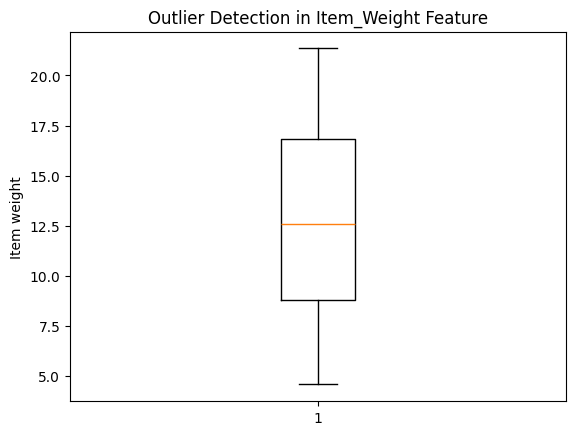

In [40]:
plt.boxplot(without_Nan_Item_weight["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.ylabel("Item weight")

#### `No Outlier present in "Item_Weight"`

In [41]:
random_sampled_Item_Weight= without_Nan_Item_weight.Item_Weight.sample(1463).values
random_sampled_Item_Weight

array([ 9.895, 19.25 , 10.3  , ..., 19.5  , 16.35 ,  6.98 ])

In [42]:
Nan_Item_weight["Item_Weight"] = random_sampled_Item_Weight
Nan_Item_weight["Item_Weight"].head()

7      9.895
18    19.250
21    10.300
23    16.500
29     6.850
Name: Item_Weight, dtype: float64

In [43]:
Imputed_Item_Weight = pd.concat([without_Nan_Item_weight,Nan_Item_weight])
Imputed_Item_Weight.Item_Weight.isnull().mean()*100

0.0

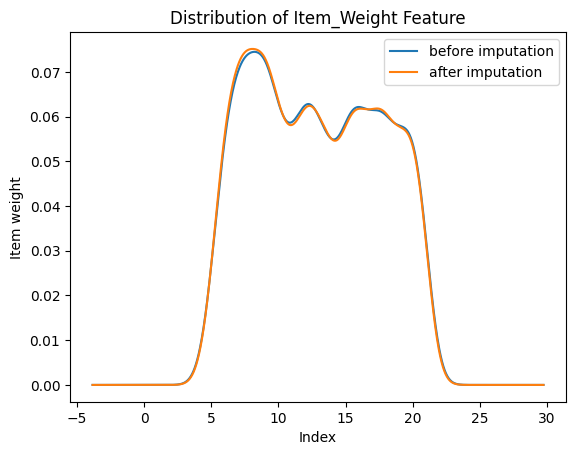

In [44]:
without_Nan_Item_weight.Item_Weight.plot.kde(label = "before imputation")
Imputed_Item_Weight.Item_Weight.plot.kde(label = "after imputation")
plt.title("Distribution of Item_Weight Feature")
plt.ylabel("Item weight")
plt.xlabel("Index")
plt.legend()

#### `"Item_Outlet_Sales" distribution for "Item_Weight" is same after the imputation as seen from the overlapping`

## Checking for change in variance in "Item_Outlet_Sales" for each "Item_Weight" after imputation

In [45]:
before_imputation = without_Nan_Item_weight['Item_Weight'].describe()['std']
after_imputation = Imputed_Item_Weight['Item_Weight'].describe()['std']

print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

Before Imputation Variance : 21.56168825983656
After Imputation Variance : 21.563037473736806


## Checking for change in Correlation with other numerical features with "Item_Weight" after imputation

In [46]:
before_imputation_correlation = without_Nan_Item_weight.select_dtypes(exclude='object').corr().iloc[:1,1:]
before_imputation_correlation

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,-0.014048,0.027141,0.014123


In [47]:
after_imputation_correlation = Imputed_Item_Weight.select_dtypes(exclude='object').corr().iloc[:1,1:]
after_imputation_correlation

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,-0.011502,0.0172,0.005746


In [48]:
after_imputation_correlation - before_imputation_correlation

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,0.002546,-0.009942,-0.008377


#### `There is not large change in correlation of other features with "Item_Weight"`

# Feature Analysis (Numerical)

In [49]:
Imputed_sales_df = Imputed_Item_Weight.copy()
Imputed_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


## Segregating Numerical and Object categorical Features

In [50]:
numerical_attributes = Imputed_sales_df.select_dtypes(exclude='object')
numerical_attributes.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
4,8.930,0.000000,53.8614,994.7052
5,10.395,0.000000,51.4008,556.6088


In [51]:
object_attributes = Imputed_sales_df.select_dtypes(include='object')
object_attributes.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,2009,Medium,Tier 3,Supermarket Type2


## Univariate Analysis

In [52]:
numerical_attributes.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.820823,0.066132,140.992782,2181.288914
std,4.643602,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.710000,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.750000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


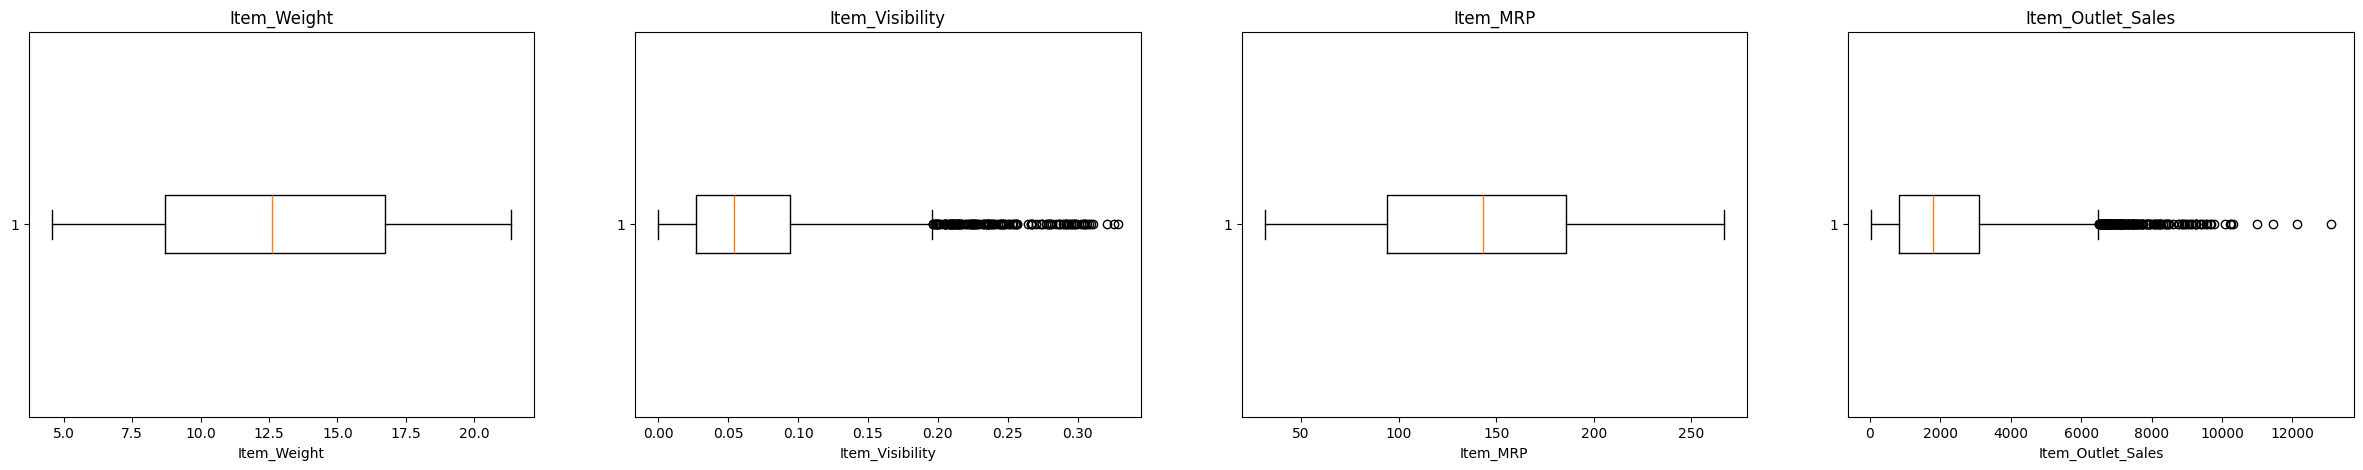

In [53]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)
    plt.boxplot(numerical_attributes[col],vert=False)
    plt.title(col)
    plt.xlabel(col)

#### `"Item_Visibility" feature has data points which is above the "upper limit" value, which can be treated as outliers, since these data points are very close to "Upper limit" and hence cannot be treated as outliers. This may help us in finding different pattern w.r.t "Item_Outlet_Sales" `

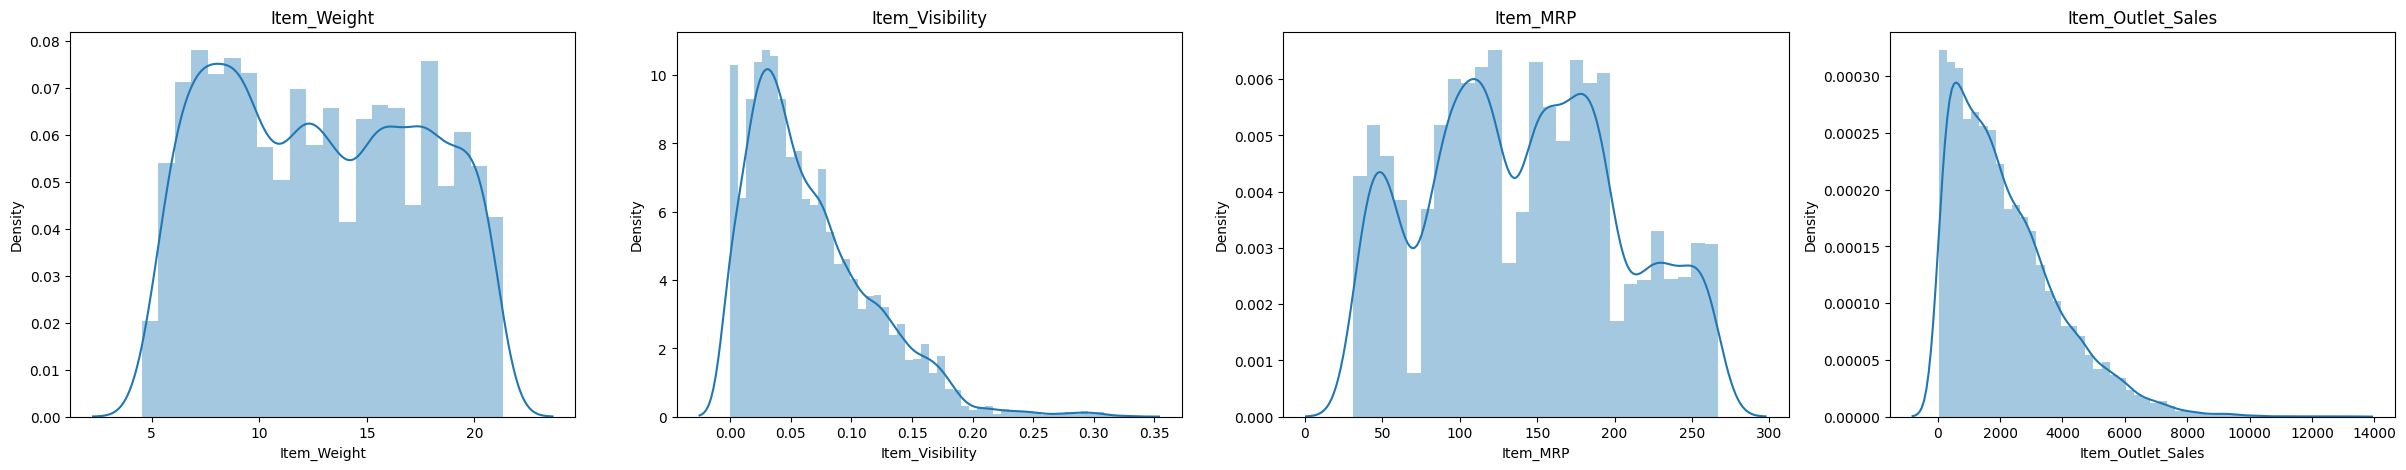

In [55]:
import seaborn as sns
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)
    sns.distplot(numerical_attributes[col])
    
    plt.title(col)
    plt.xlabel(col)

#### `People used to buy more items which has :`
* "Item_Weight" between 7 and 9
* "Item_Visibility" between 0.02 and 0.05
* "Item_MRP" in range of 90-105 and 150-200

#### `Highest "Item_Outlet_Sales" is in range of 0 and 1000`

## Bivariate Analysis

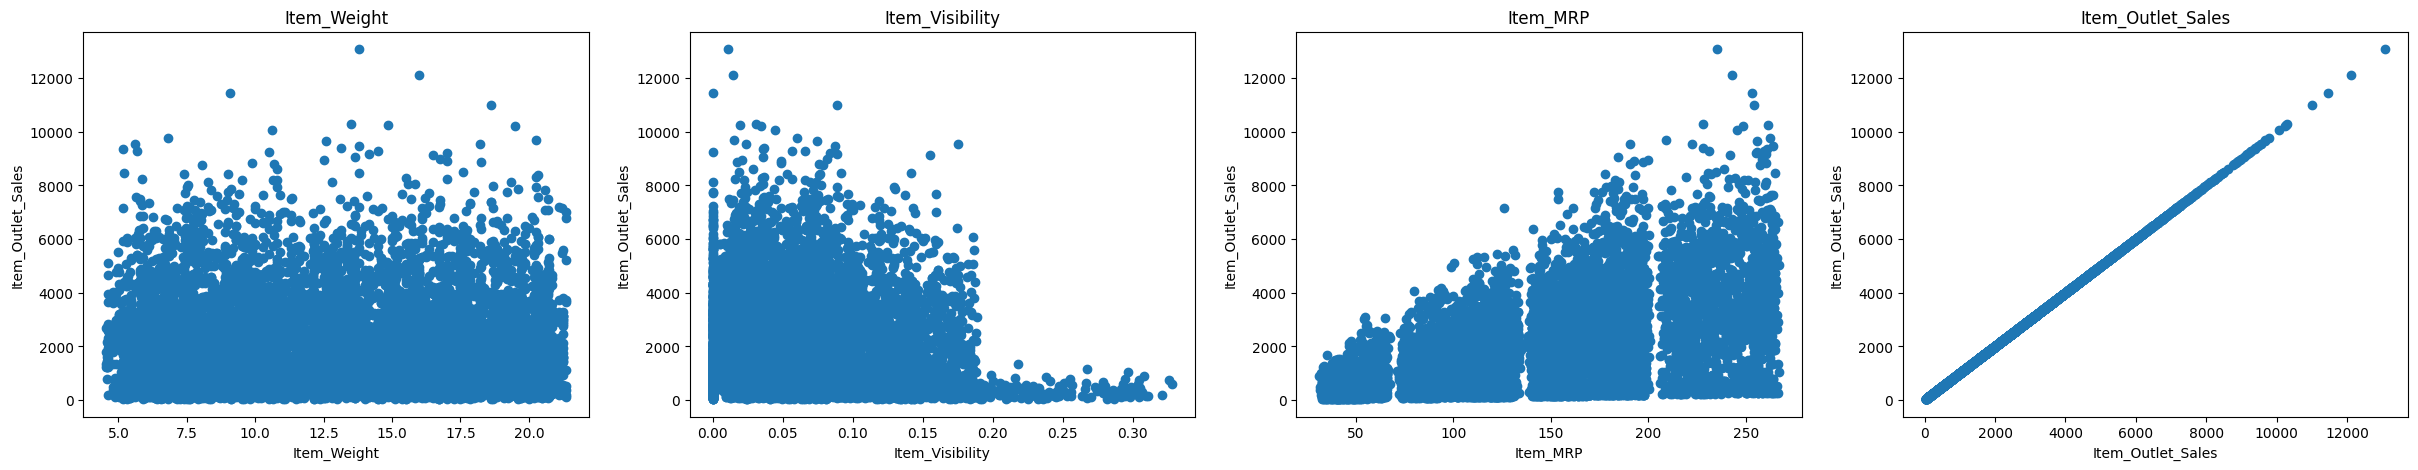

In [56]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)

    x = numerical_attributes[col]
    y =  numerical_attributes["Item_Outlet_Sales"]
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Item_Outlet_Sales")

#### `"Item_Outlet_Sales" seems to be not much dependable on "Item_Weight"`
#### `"Item_Outlet_Sales" is less for "Item_Visibility" >= 0.19 approx. and these are very less in number`
#### `"Item_Outlet_Sales" is increasing gradually with increase in "Item_MRP`
#### `"Item_Outlet_Sales" are most less than 8000`

## Multivariate Analysis

In [57]:
import seaborn as sns 

<Axes: >

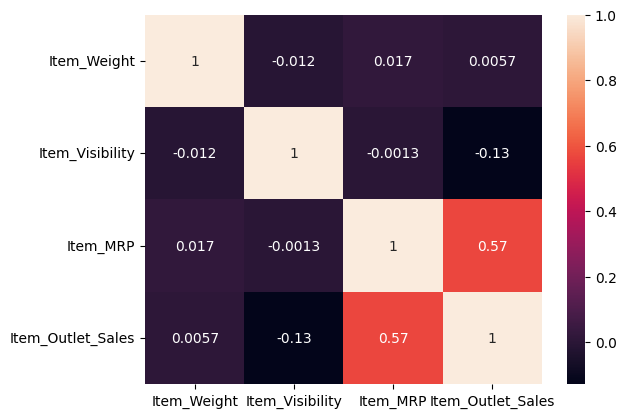

In [58]:
sns.heatmap(numerical_attributes.corr(),annot=True)

#### `Highest correlation is between Item_MRP and Item_Outlet_Sales i.e. 0.57`

# Feature Analysis (Object Categorical)

In [60]:
object_attributes.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [61]:
object_attributes.drop("Item_Identifier",axis=1,inplace=True)
object_attributes.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
5,Regular,Baking Goods,OUT018,2009,Medium,Tier 3,Supermarket Type2


#### `Dropped "Item_Identifier" due to risk at production level testing, which can be done for different Item Identifier which is not in "Item_Identifier"`

## Univariate Analysis

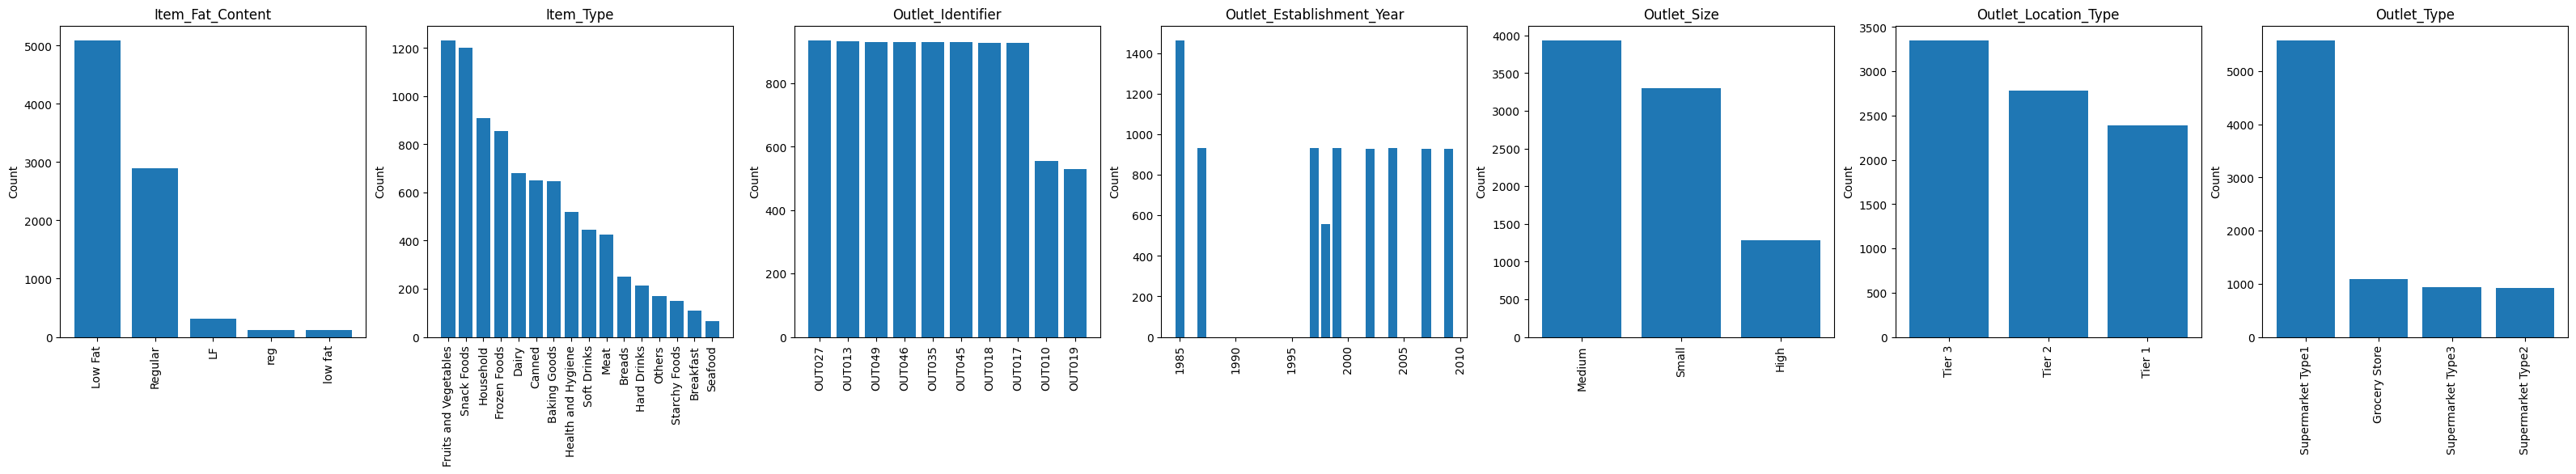

In [62]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    x = object_attributes[col].value_counts().index.values
    y = object_attributes[col].value_counts()
    plt.bar(x,y)
    plt.title(col)
    plt.ylabel("Count")
    plt.xticks(rotation = 90)                   

#### `People used to buy more Items :`
*  which contains "Low Fat" and "Regular" Item_Fat_Content
*  which are "Fruits and vegetables" and "Snack Food" Item_Type
*  Which does not have Item_Identifier of OUT010 and OUT019
*  from oldest Outlet which has 1985 as establishment year 
*  Whose Outlet_Size is not "High" 
*  Whose Outlet_Location_Type is "Tier 3"
*  from "Supermarket Type1" Outlet_Type

In [63]:
object_attributes.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
5,Regular,Baking Goods,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [64]:
object_attributes.insert(object_attributes.shape[1],"Item_Outlet_Sales",numerical_attributes["Item_Outlet_Sales"])
object_attributes.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,Regular,Baking Goods,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


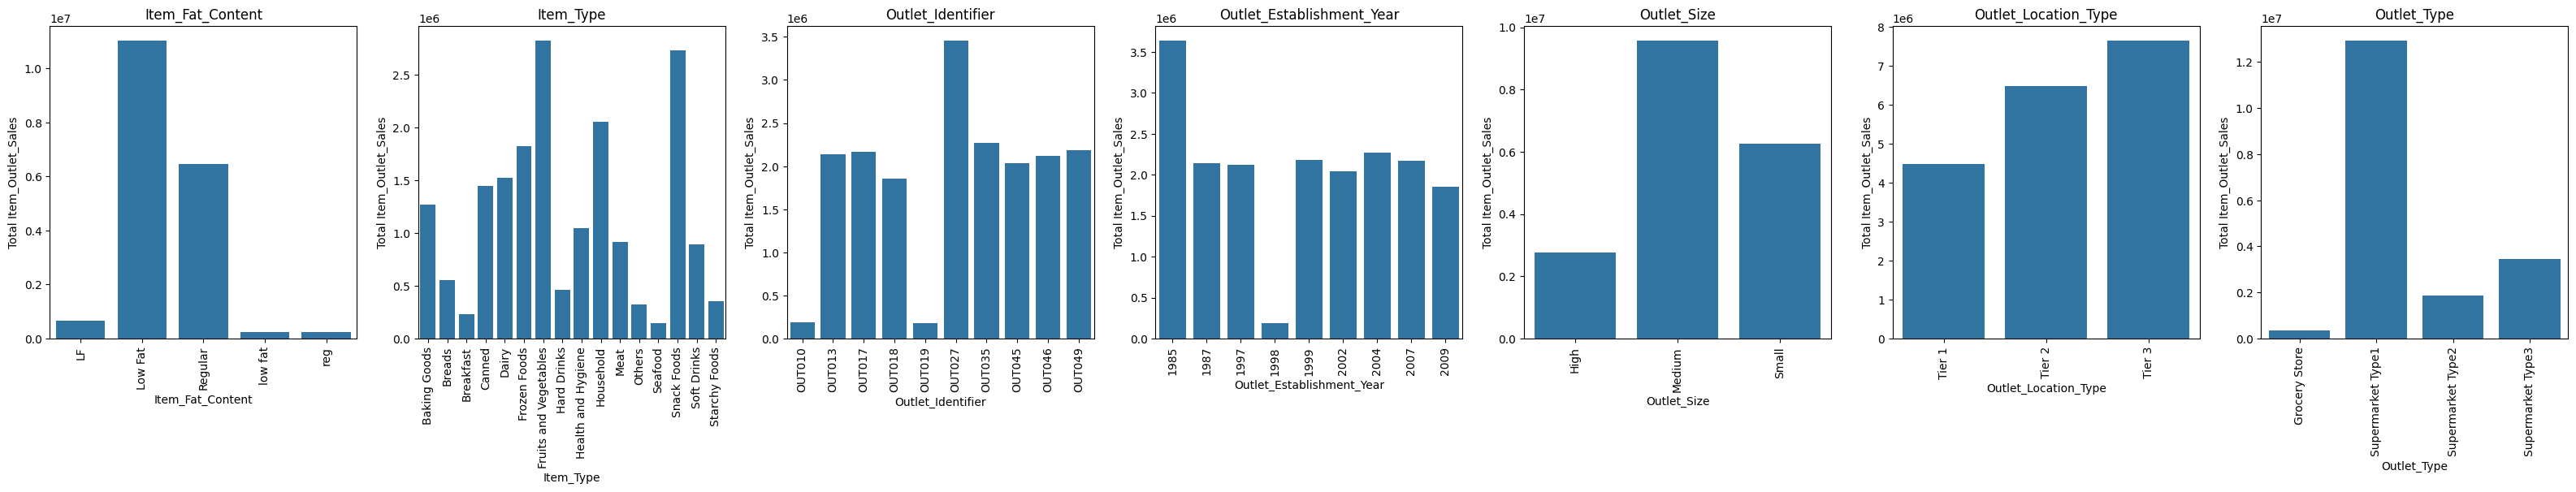

In [65]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns[:-1]

idx = 1

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    data=object_attributes.groupby(col).sum("Item_Outlet_Sales")
    sns.barplot(x = data.index,y = data.Item_Outlet_Sales)
    plt.title(col)
    plt.ylabel(f"Total Item_Outlet_Sales")
    plt.xticks(rotation = 90)                 
              


#### `Highest Total sales comes from : `
* Item with "Low Fat"
* "Fruits and Vegetables" and "Snack Foods" Item_Type
* "OUT027" Outlet_Identifier
* "Oldest" outlet (1985)
* "Medium" sized outlet 
* "Tier3" Outlet_location_Type 
* "Supermarket Type1" Outlet_Type 

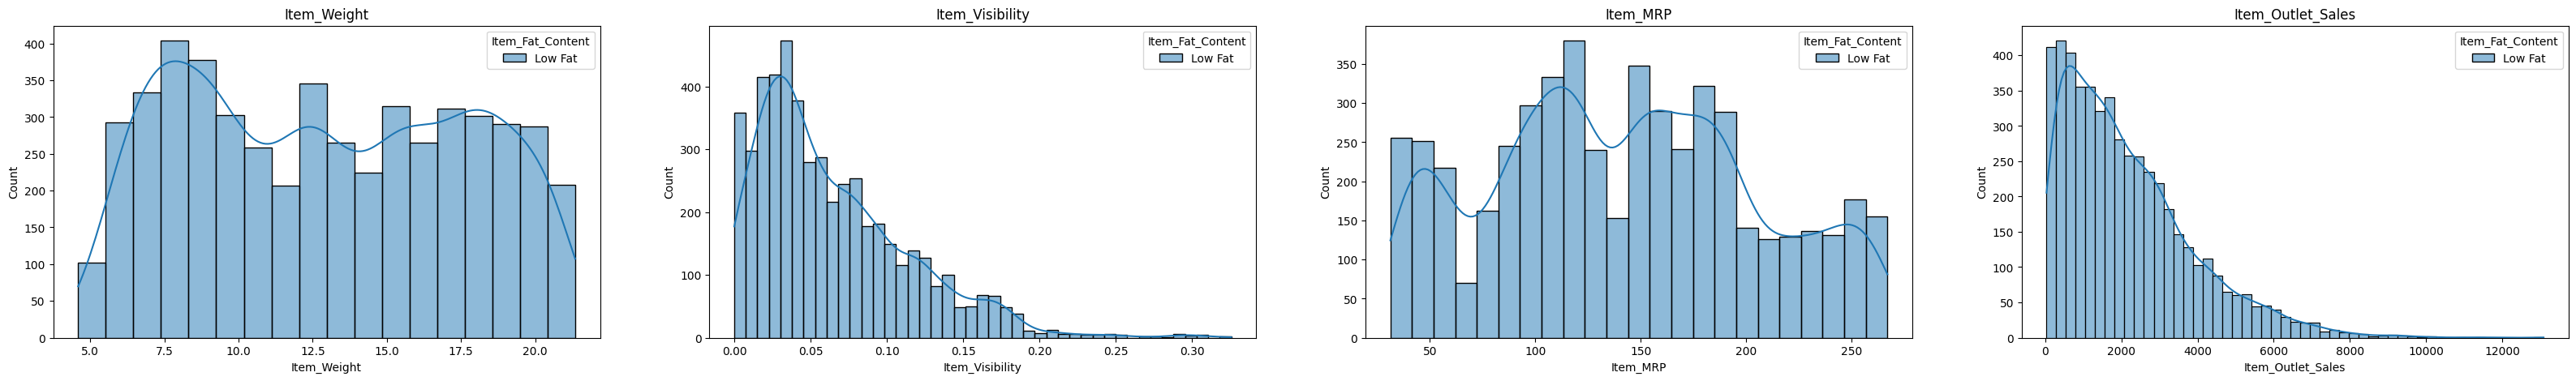

In [74]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Item_Fat_Content"]=="Low Fat")]
    sns.histplot(data =data ,x = num_col,hue = "Item_Fat_Content",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales Comes from LOW FAT Items having :`
* "Item_Weight" in range 7.5 - 9
* "Item_Visibility" in range 0.03 -0.05
* "Item_MRP" in range 95-105 and 150-170

#### `Most Item_Outlet_Sales for LOW FAT Item_content_type is in range 300-1500`

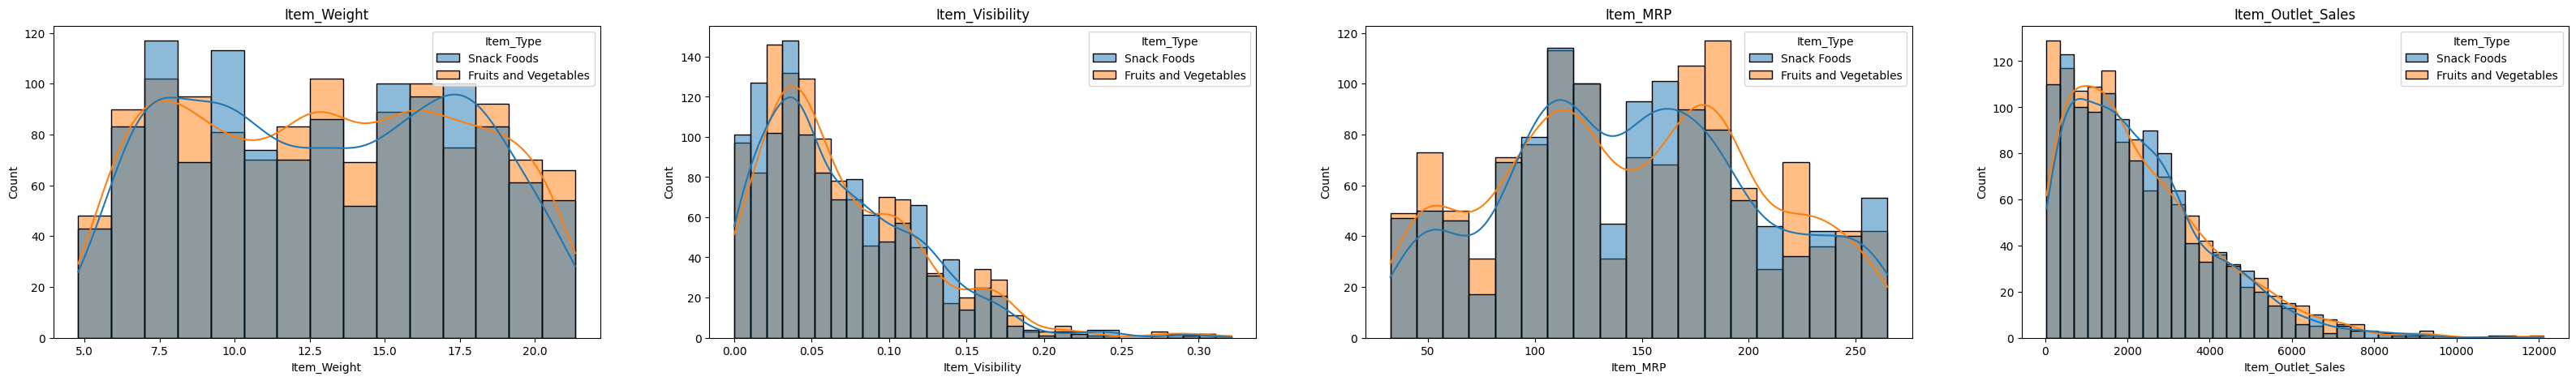

In [78]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Item_Type"]=="Fruits and Vegetables") | 
                            (Imputed_sales_df["Item_Type"]=="Snack Foods")]
    sns.histplot(data =data ,x = num_col,hue = "Item_Type",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales for Fruits and Vegetables, and Snack Food Comes from Items having :`
* "Item_Weight" in range 7.5 - 8  
* "Item_Visibility" in range 0.03 -0.05 
* "Item_MRP" in range 95-105 and 150-170 

#### `Most Item_Outlet_Sales for Item_Type Fruits and Vegetables, and Snack Food is in range 500-1500`


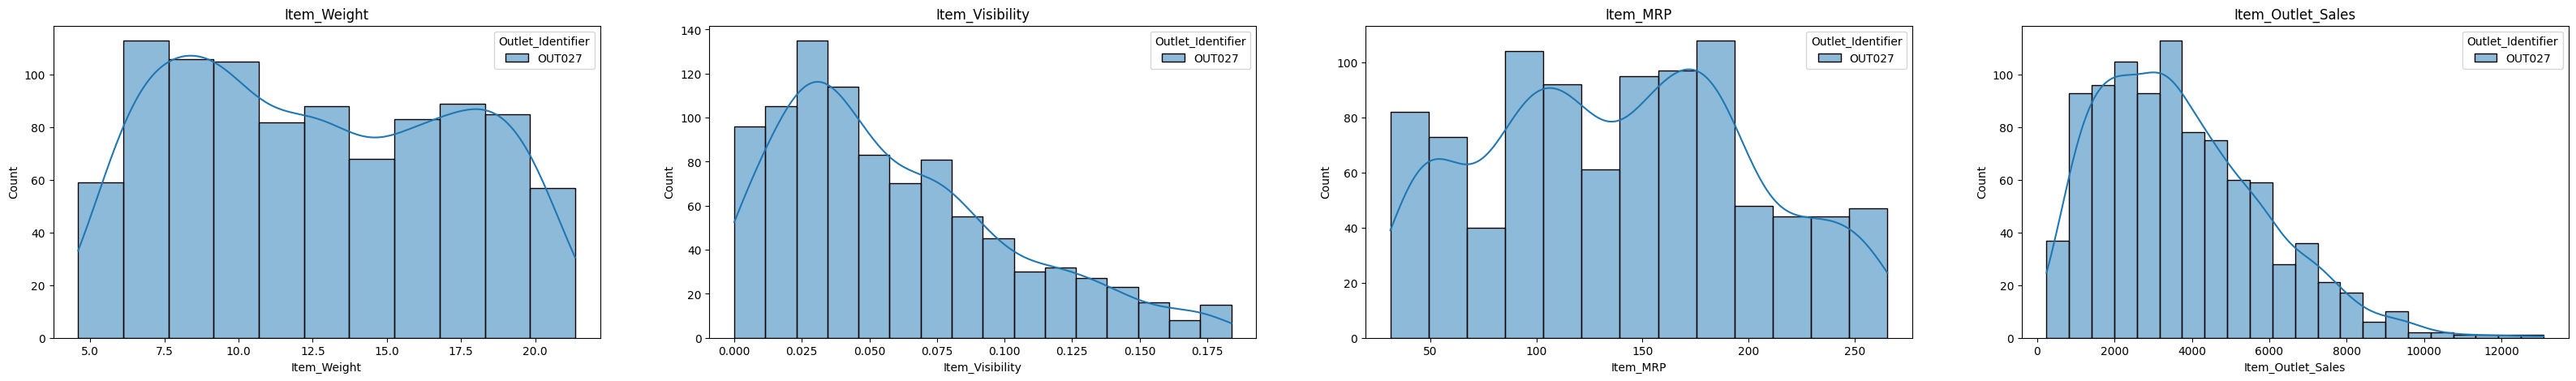

In [77]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Outlet_Identifier"]=="OUT027")]
    sns.histplot(data =data ,x = num_col,hue = "Outlet_Identifier",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales for OUT027 "Outlet_Identifier" Comes from Items having :`
* "Item_Weight" in range 7.5 - 8  
* "Item_Visibility" in range 0.03 -0.05 
* "Item_MRP" in range 95-105 and 150-170 

#### `Most Item_Outlet_Sales for  OUT027 "Outlet_Identifier" is in range 2000-4000`


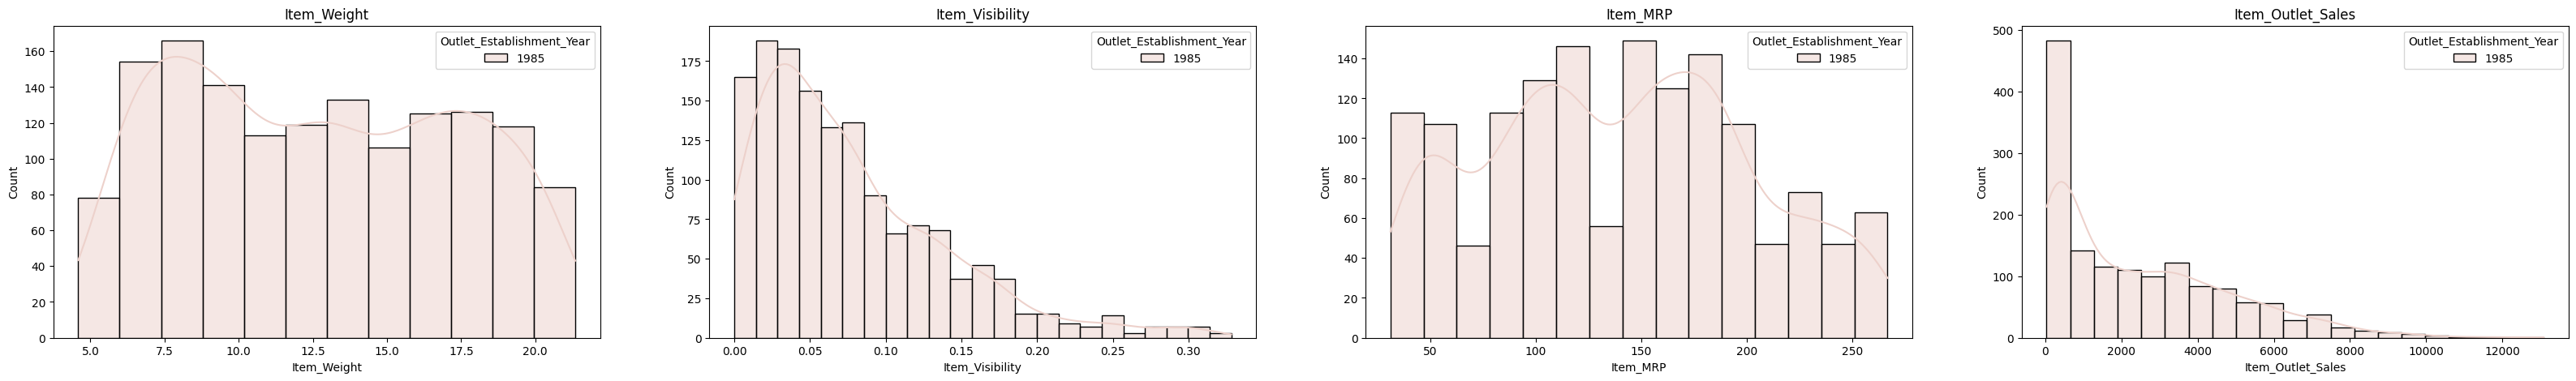

In [82]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Outlet_Establishment_Year"]==1985)]
    sns.histplot(data =data ,x = num_col,hue = "Outlet_Establishment_Year",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales for 1985 "Outlet_Establishment_Year" Comes from Items having :`
* "Item_Weight" in range 7.5 - 8  
* "Item_Visibility" in range 0.03 -0.05 
* "Item_MRP" in range 95-105 and 150-170 

#### `Most Item_Outlet_Sales for 1985 "Outlet_Establishment_Year" is in range 0-1000`


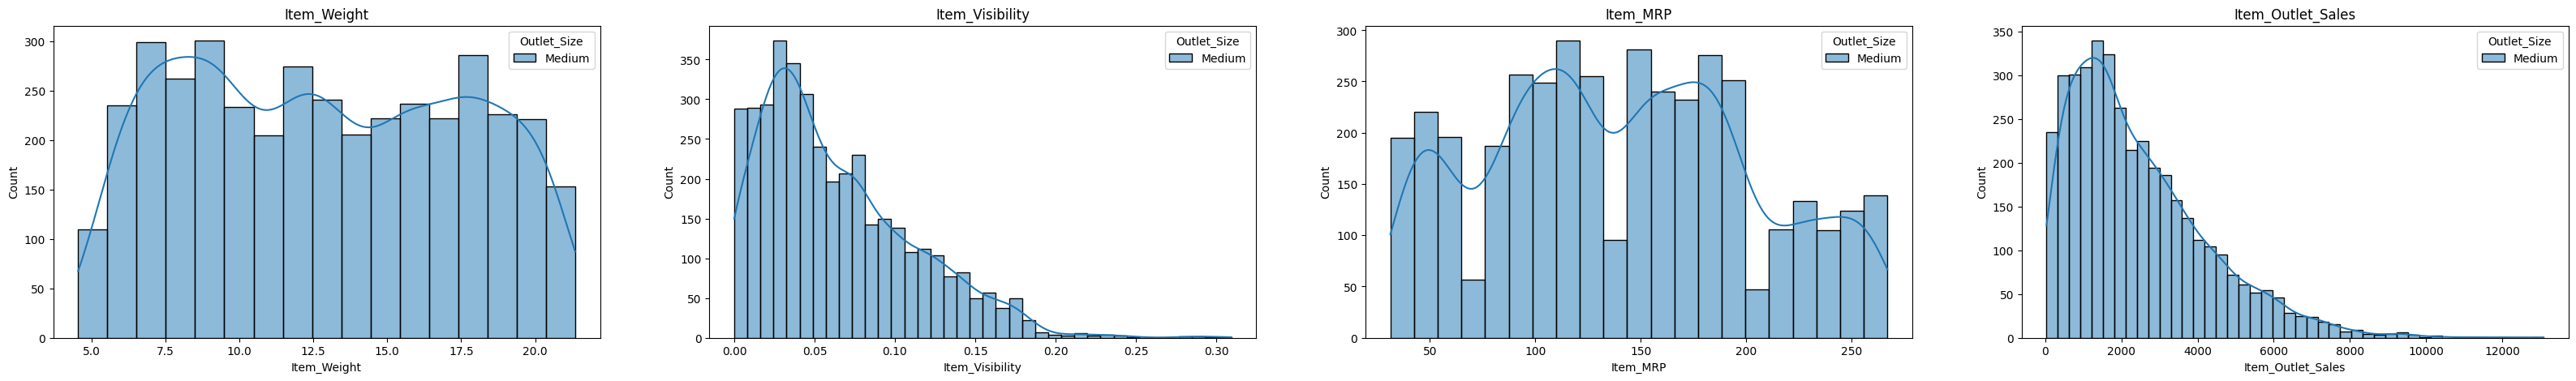

In [83]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Outlet_Size"]=="Medium")]
    sns.histplot(data =data ,x = num_col,hue = "Outlet_Size",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales for MEDIUM "Outlet_Size" Comes from Items having :`
* "Item_Weight" in range 7.5 - 8  
* "Item_Visibility" in range 0.03 -0.05 
* "Item_MRP" in range 95-105 and 150-170 

#### `Most Item_Outlet_Sales for MEDIUM "Outlet_Size" is in range 1000-2000`


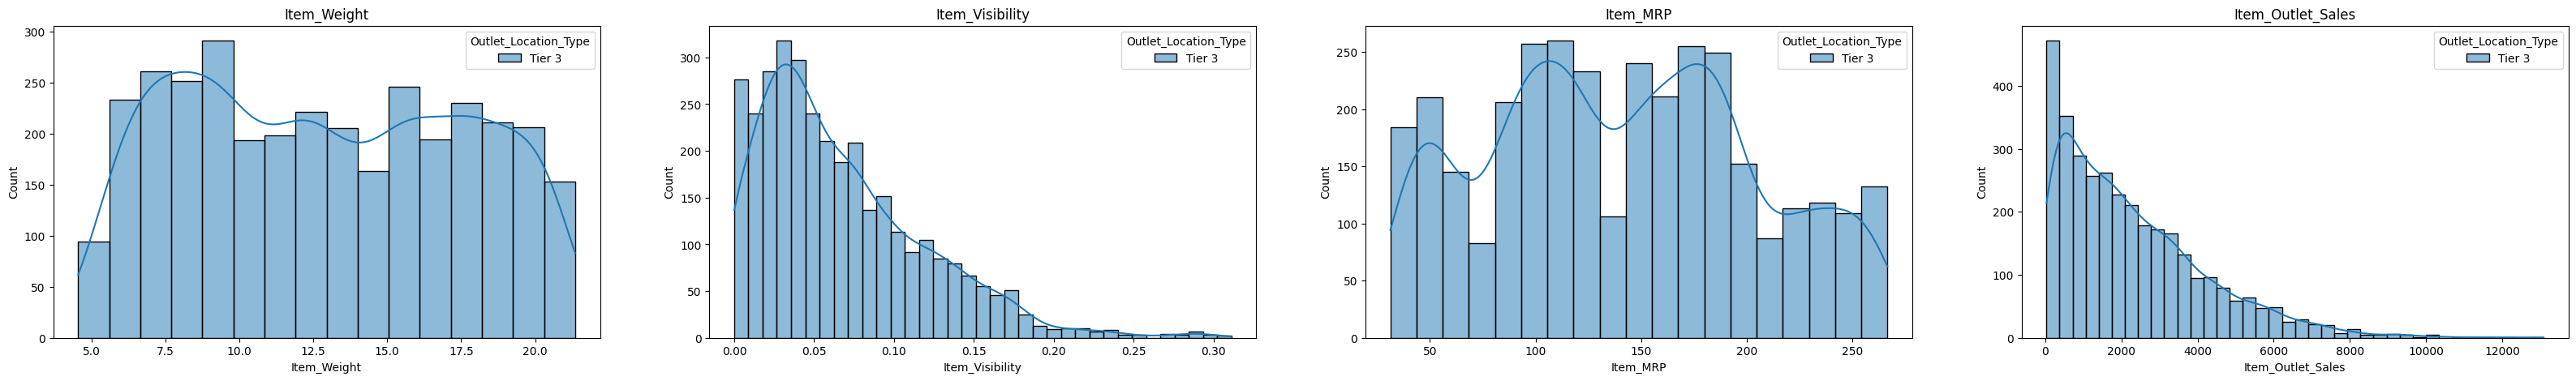

In [92]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Outlet_Location_Type"]=="Tier 3")]
    sns.histplot(data =data ,x = num_col,hue = "Outlet_Location_Type",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales for TIER 3 "Outlet_Location_Type" Comes from Items having :`
* "Item_Weight" in range 7.5 - 8  
* "Item_Visibility" in range 0.03 -0.05 
* "Item_MRP" in range 95-105 and 150-170 

#### `Most Item_Outlet_Sales for TIER 3 "Outlet_Location_Type" is in range 0-1000`


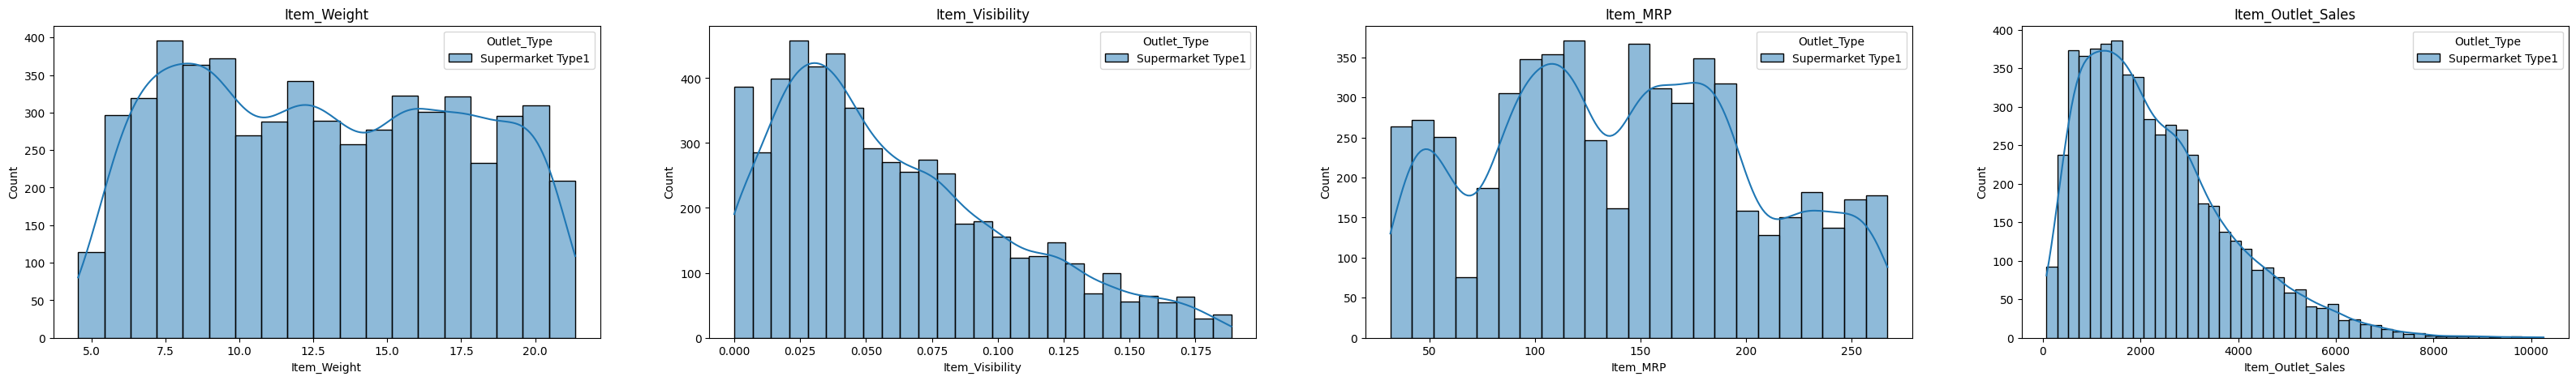

In [90]:
plt.figure(figsize = (40,5))

numerical_columns = numerical_attributes.columns

idx = 1

for num_col in numerical_columns:
    plt.subplot(1,4,idx)
    data = Imputed_sales_df[(Imputed_sales_df["Outlet_Type"]=="Supermarket Type1")]
    sns.histplot(data =data ,x = num_col,hue = "Outlet_Type",kde=True)
    plt.title(f"{num_col}")
    idx+=1
 

#### `Most Sales for Supermarket Type1 "Outlet_Type" Comes from Items having :`
* "Item_Weight" in range 7.5 - 8  
* "Item_Visibility" in range 0.03 -0.05 
* "Item_MRP" in range 95-105 and 150-170 

#### `Most Item_Outlet_Sales for Supermarket Type1 "Outlet_Type" is in range 1000-2000`


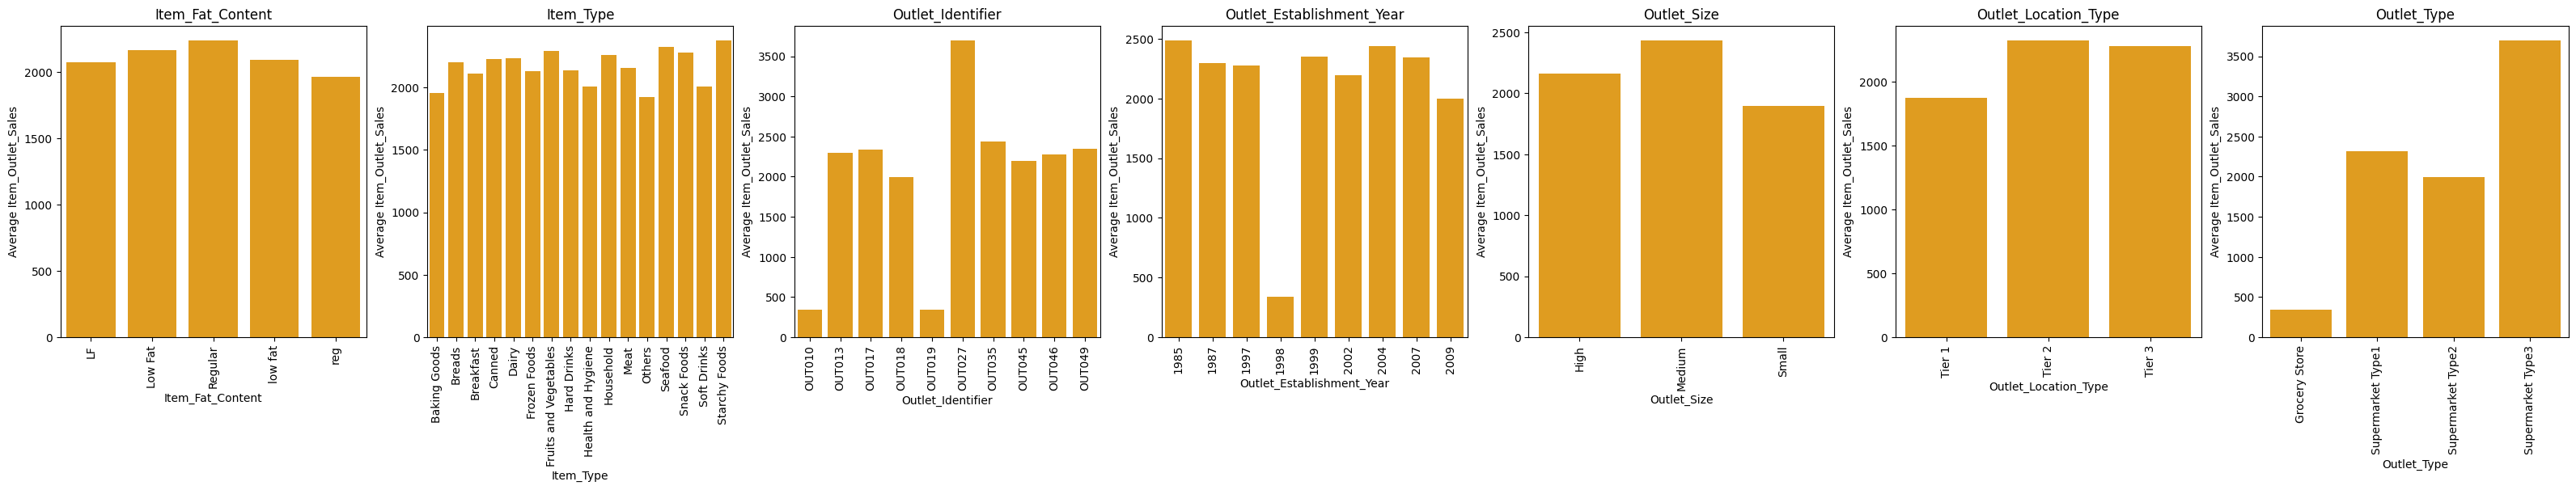

In [66]:
plt.figure(figsize = (40,5))

columns = object_attributes.columns[:-1]

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    data=object_attributes.groupby(col).mean("Item_Outlet_Sales")
    sns.barplot(x = data.index,y = data.Item_Outlet_Sales,color="orange")
    plt.ylabel("Average Item_Outlet_Sales")
    plt.title(col)
    plt.xticks(rotation = 90)                   



#### `Based on  Average Price of items we deduce that : `
* In every categories are almost same for "Item_Fat_Content" and "Item_type"
* OUT027 "Outlet_Identifier" is most expensive and, OUT019 and OUT010 "Outlet_Identifier" are cheaper
* outlet established in 1998 is most cheaper
* SMALL outlize is more cheaper than HIGH and MEDIUM sized outlet
* TIER1 "outlet_location_type" is more cheaper than TIER2 and TIER3 
* "Grocery store" items are most cheaper and "Supermarket Type3" items are most expensive

## Multivariate Analysis

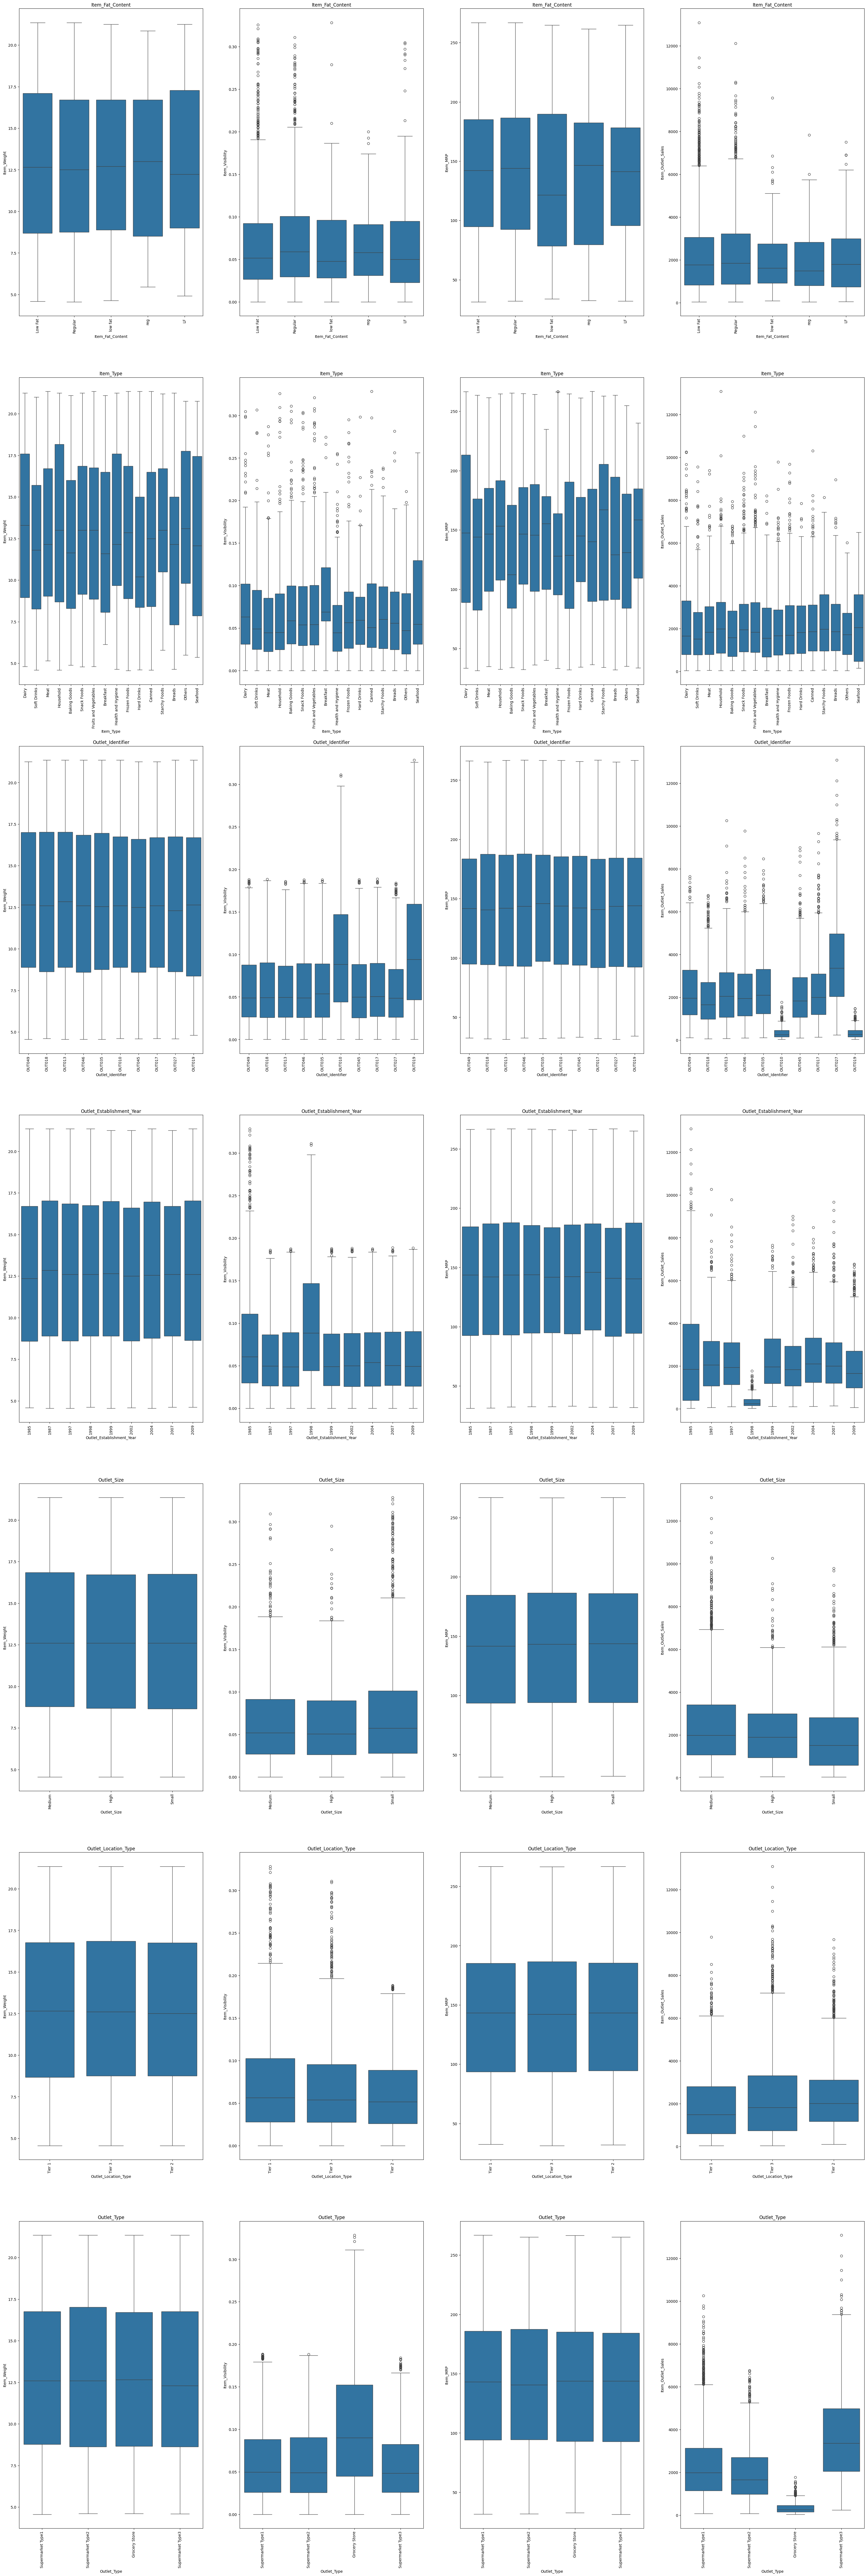

In [67]:
plt.figure(figsize = (40,120))

object_columns = object_attributes.columns[:-1]
numerical_columns = numerical_attributes.columns

idx = 1

for obj_col in object_columns: 
    for num_col in numerical_columns:
        plt.subplot(7,4,idx)
        sns.boxplot(data = Imputed_sales_df,x = obj_col,y = num_col)
        plt.title(f"{obj_col}")
        plt.xticks(rotation = 90)                   

        idx+=1
 
                    


#### `From Above plot we deduced that more the visibilty of items less will be its sale, Below are most visible :`
* Grocery Store Outlet_type
* 1998 outlet_established
* OUT10 and OUT19 outlet_identifier
* Breakfast and Seafood Item_type

In [93]:
import pingouin as pg
from scipy import stats

In [94]:
all_welch_df  = []

columns = object_attributes.columns[:-1]

for col in columns:
    welch_df = pg.welch_anova(dv="Item_Outlet_Sales", between=col,data = Imputed_sales_df)
    all_welch_df.append(welch_df)

pd.concat(all_welch_df)    

,Source,ddof1,ddof2,F,p-unc,np2
0,Item_Fat_Content,4,396.064073,1.872838,1.143811e-01,0.000810
0,Item_Type,15,1470.243086,2.959168,1.130443e-04,0.004739
0,Outlet_Identifier,9,3467.964667,1229.872085,0.000000e+00,0.240840
0,Outlet_Establishment_Year,8,3429.536696,1061.855407,0.000000e+00,0.087908
0,Outlet_Size,2,3699.403566,90.394194,4.692506e-39,0.020928
0,Outlet_Location_Type,2,5572.631517,61.835588,2.746618e-27,0.012505
0,Outlet_Type,3,2239.248940,3684.848608,0.000000e+00,0.239575


In [95]:
pg.pairwise_gameshowell(dv="Item_Outlet_Sales", between="Item_Fat_Content",data = Imputed_sales_df )

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,LF,Low Fat,2073.551928,2164.477336,-90.925407,89.618430,-1.014584,365.058531,0.848601,-0.053570
1,LF,Regular,2073.551928,2235.186702,-161.634773,92.154132,-1.753961,407.457902,0.402172,-0.094515
2,LF,low fat,2073.551928,2087.740737,-14.188809,186.364692,-0.076135,175.397546,0.999992,-0.008889
3,LF,reg,2073.551928,1962.192268,111.359660,166.771677,0.667737,206.394311,0.963075,0.072307
4,Low Fat,Regular,2164.477336,2235.186702,-70.709366,40.069184,-1.764682,5939.121971,0.394483,-0.041243
5,Low Fat,low fat,2164.477336,2087.740737,76.736598,166.868073,0.459864,115.706379,0.990685,0.044935
6,Low Fat,reg,2164.477336,1962.192268,202.285067,144.658036,1.398367,122.612944,0.629885,0.118756
7,Regular,low fat,2235.186702,2087.740737,147.445964,168.243499,0.876384,119.563242,0.905053,0.085283
8,Regular,reg,2235.186702,1962.192268,272.994434,146.242499,1.866724,128.062901,0.340582,0.158590
9,low fat,reg,2087.740737,1962.192268,125.548469,218.234468,0.575292,220.816252,0.978558,0.076005


## `From Welch Annova we can deduce that "Item_Fat_Content" does not have significant affect on "Item_Outlet_Sales" because of its all Class labels have does not have significant differences in sales as proved by p-unc is 0.1143 which is less than 0.005` 

## `It can also proved from the mean sales difference between the "Item_Fat_Content" labels which have pvalue>0.005 which shows there sales is not significantly different`

## `Hence, We are dropping "Item_Fat_Content" Attribute` 


In [80]:
object_attributes.drop("Item_Fat_Content",axis = 1,inplace=True)
object_attributes.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,Meat,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
4,Household,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2,556.6088


In [257]:
modified_sales_df = pd.concat([object_attributes,numerical_attributes],axis = 1)
modified_sales_df.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,9.300,0.016047,249.8092,1999,3735.1380
1,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,5.920,0.019278,48.2692,2009,443.4228
2,Meat,OUT049,Medium,Tier 1,Supermarket Type1,17.500,0.016760,141.6180,1999,2097.2700
4,Household,OUT013,High,Tier 3,Supermarket Type1,8.930,0.000000,53.8614,1987,994.7052
5,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2,10.395,0.000000,51.4008,2009,556.6088


# Train validation split

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
train,validation = train_test_split(modified_sales_df)

In [261]:
train.shape

(6392, 10)

In [262]:
validation.shape

(2131, 10)

# Standardization

In [268]:
numerical_train = train.select_dtypes(exclude='object')
numerical_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
2813,10.195,0.187841,112.4860,1998,113.1860
5899,13.000,0.000000,173.6054,1987,1751.0540
6139,12.350,0.054870,40.5480,1985,39.9480
2982,5.325,0.029596,40.9822,1985,864.2084
8383,16.500,0.012482,168.3474,1985,5221.8694


In [269]:
object_train = train.select_dtypes(include='object')
object_train.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
2813,Hard Drinks,OUT010,Medium,Tier 3,Grocery Store
5899,Soft Drinks,OUT013,High,Tier 3,Supermarket Type1
6139,Others,OUT019,Small,Tier 1,Grocery Store
2982,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8383,Household,OUT027,Medium,Tier 3,Supermarket Type3


In [109]:
from sklearn.preprocessing import StandardScaler

In [272]:
standardizer = StandardScaler()
standardized_numerical_train = standardizer.fit_transform(numerical_train)
standardized_numerical_train

array([[-0.56719875,  2.68480372, -0.45692118,  0.01556506, -1.20839824],
       [ 0.03668525, -1.39404536,  0.51844405, -1.30141501, -0.24794589],
       [-0.10325222, -0.20258337, -1.6049335 , -1.54086593, -1.2513453 ],
       ...,
       [-0.54459347, -0.11770933,  0.74581234, -1.30141501,  0.28303589],
       [ 1.47911763,  2.102565  ,  1.80302798,  0.4944669 ,  1.56637202],
       [ 1.45758879, -0.864998  , -1.51199521,  1.0930942 , -0.88668575]])

# Encoding Categorical Attributes

In [133]:
from sklearn.preprocessing import OneHotEncoder

In [273]:
nominal_train = object_train.iloc[:,:2]
nominal_train.head()

,Item_Type,Outlet_Identifier
2813,Hard Drinks,OUT010
5899,Soft Drinks,OUT013
6139,Others,OUT019
2982,Snack Foods,OUT027
8383,Household,OUT027


In [274]:
ohe = OneHotEncoder(sparse = False)
ohe_nominal_train = ohe.fit_transform(nominal_train)
ohe_nominal_train

c:\Users\hp\Desktop\Projects\Big-Mart-Sales-Prediction\Environment\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
from sklearn.preprocessing import OrdinalEncoder

In [275]:
ordinal_train = object_train.iloc[:,2:]
ordinal_train.head()

,Outlet_Size,Outlet_Location_Type,Outlet_Type
2813,Medium,Tier 3,Grocery Store
5899,High,Tier 3,Supermarket Type1
6139,Small,Tier 1,Grocery Store
2982,Medium,Tier 3,Supermarket Type3
8383,Medium,Tier 3,Supermarket Type3


In [276]:
oe = OrdinalEncoder()
oe_ordinal_train = oe.fit_transform(ordinal_train)
oe_ordinal_train

array([[1., 2., 0.],
       [0., 2., 1.],
       [2., 0., 0.],
       ...,
       [0., 2., 1.],
       [2., 1., 1.],
       [2., 1., 1.]])

In [277]:
encoded_object_train = np.concatenate((ohe_nominal_train,oe_ordinal_train),axis = 1)
encoded_object_train

array([[0., 0., 0., ..., 1., 2., 0.],
       [0., 0., 0., ..., 0., 2., 1.],
       [0., 0., 0., ..., 2., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 2., 1.],
       [0., 0., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 2., 1., 1.]])

# Getting combined data (standardized+encoded)

In [278]:
combined_train = np.concatenate((encoded_object_train,standardized_numerical_train),axis = 1)
combined_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.45692118,
         0.01556506, -1.20839824],
       [ 0.        ,  0.        ,  0.        , ...,  0.51844405,
        -1.30141501, -0.24794589],
       [ 0.        ,  0.        ,  0.        , ..., -1.6049335 ,
        -1.54086593, -1.2513453 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.74581234,
        -1.30141501,  0.28303589],
       [ 0.        ,  0.        ,  0.        , ...,  1.80302798,
         0.4944669 ,  1.56637202],
       [ 0.        ,  0.        ,  0.        , ..., -1.51199521,
         1.0930942 , -0.88668575]])

# Dividing into Independent and dependent features

In [279]:
x = combined_train[:,:-1]
y = combined_train[:,-1]

In [280]:
print(x.shape)
print(y.shape)

(6392, 33)
(6392,)


# Training Decision Tree Regressor

In [370]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.regression import linear_model

In [374]:
# dtr = DecisionTreeRegressor()
# dtr = SGDRegressor(penalty='elasticnet')
dtr = linear_model.OLS(x,y)

In [ ]:
dtr.fit(x)

# Hyperparameter tuning ()

# Model Evaluation

In [357]:
numerical_validation = validation.select_dtypes(exclude='object')
numerical_validation.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
4161,18.850,0.137973,158.4578,2007,1444.1202
6681,8.210,0.010781,149.9392,1999,1938.8096
6039,9.420,0.000000,59.8904,1985,1757.7120
2270,7.655,0.031918,117.7492,1987,695.0952
6033,19.000,0.097510,48.1718,2002,709.0770


In [358]:
object_validation = validation.select_dtypes(include='object')
object_validation.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4161,Hard Drinks,OUT017,Medium,Tier 2,Supermarket Type1
6681,Hard Drinks,OUT049,Medium,Tier 1,Supermarket Type1
6039,Starchy Foods,OUT027,Medium,Tier 3,Supermarket Type3
2270,Canned,OUT013,High,Tier 3,Supermarket Type1
6033,Frozen Foods,OUT045,Medium,Tier 2,Supermarket Type1


In [359]:
nominal_validation = object_validation.iloc[:,:2]
nominal_validation.head()

,Item_Type,Outlet_Identifier
4161,Hard Drinks,OUT017
6681,Hard Drinks,OUT049
6039,Starchy Foods,OUT027
2270,Canned,OUT013
6033,Frozen Foods,OUT045


In [360]:
ordinal_validation = object_validation.iloc[:,2:]
ordinal_validation.head()

,Outlet_Size,Outlet_Location_Type,Outlet_Type
4161,Medium,Tier 2,Supermarket Type1
6681,Medium,Tier 1,Supermarket Type1
6039,Medium,Tier 3,Supermarket Type3
2270,High,Tier 3,Supermarket Type1
6033,Medium,Tier 2,Supermarket Type1


In [361]:
standardized_numerical_validation = standardizer.transform(numerical_validation)
standardized_numerical_validation

array([[ 1.29612248,  1.60195002,  0.27671323,  1.0930942 , -0.4279331 ],
       [-0.99454625, -1.15993941,  0.14077037,  0.13529052, -0.13784526],
       [-0.73404727, -1.39404536, -1.29626056, -1.54086593, -0.24404161],
       ...,
       [ 0.65025724,  0.10614514,  1.2383447 ,  0.73391782, -0.63642154],
       [-0.04943011,  0.5045861 , -0.49782564,  0.73391782, -0.88590489],
       [-1.0289924 , -1.39404536,  1.85829497, -1.30141501,  1.74714009]])

In [362]:
ohe_nominal_validation = ohe.transform(nominal_validation)
ohe_nominal_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [363]:
oe_ordinal_validation = oe.transform(ordinal_validation)
oe_ordinal_validation

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 2., 3.],
       ...,
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 2., 1.]])

In [364]:
encoded_object_validation = np.concatenate((ohe_nominal_validation,oe_ordinal_validation),axis=1)
encoded_object_validation

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 2., 3.],
       ...,
       [0., 1., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 0., 2., 1.]])

In [365]:
combined_validation = np.concatenate((encoded_object_validation,standardized_numerical_validation),axis=1)
combined_validation

array([[ 0.        ,  0.        ,  0.        , ...,  0.27671323,
         1.0930942 , -0.4279331 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.14077037,
         0.13529052, -0.13784526],
       [ 0.        ,  0.        ,  0.        , ..., -1.29626056,
        -1.54086593, -0.24404161],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.2383447 ,
         0.73391782, -0.63642154],
       [ 0.        ,  0.        ,  0.        , ..., -0.49782564,
         0.73391782, -0.88590489],
       [ 0.        ,  0.        ,  0.        , ...,  1.85829497,
        -1.30141501,  1.74714009]])

In [366]:
from sklearn.metrics import mean_squared_error,r2_score

In [367]:
x = combined_validation[:,:-1]
y = combined_validation[:,-1]

In [368]:
predications = dtr.predict(x)
predications

array([ 0.28646342,  0.1974217 ,  0.3269895 , ...,  0.7978861 ,
       -0.07266697,  1.25549819])

In [369]:
r2_score(y,predications)

0.566817213707213

In [354]:
mean_squared_error(y,predications)**1/2

0.21741521591198368

# Reverse Transforming Predictions

In [226]:
predications.shape

(2131,)

In [307]:
reshaped_predictions = predications.reshape(-1,1)
reshaped_predictions.shape

(2131, 1)

In [308]:
x[:,-4:].shape

(2131, 4)

In [309]:
validation_predictions = np.concatenate((x[:,-4:],reshaped_predictions),axis=1)
validation_predictions

array([[ 1.29612248,  1.60195002,  0.27671323,  1.0930942 ,  0.79527715],
       [-0.99454625, -1.15993941,  0.14077037,  0.13529052,  0.47434551],
       [-0.73404727, -1.39404536, -1.29626056, -1.54086593, -0.25809701],
       ...,
       [ 0.65025724,  0.10614514,  1.2383447 ,  0.73391782,  1.55114534],
       [-0.04943011,  0.5045861 , -0.49782564,  0.73391782,  0.60474839],
       [-1.0289924 , -1.39404536,  1.85829497, -1.30141501,  1.14900472]])

In [310]:
inverse_transformed = standardizer.inverse_transform(validation_predictions)
inverse_transformed.shape

(2131, 5)

In [311]:
inverse_transformed[:,-1]

array([3530.0716, 2982.784 , 1733.7432, ..., 4819.0604, 3205.1612,
       4133.2864])